# One-dimensional function interpolation

In [1]:
import minterpy as mp
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Setup

Create a test function:

In [2]:
fx = lambda x: x * np.sin(12*x)
x = np.linspace(-1, 1, 300)
y = fx(x)

The plot:

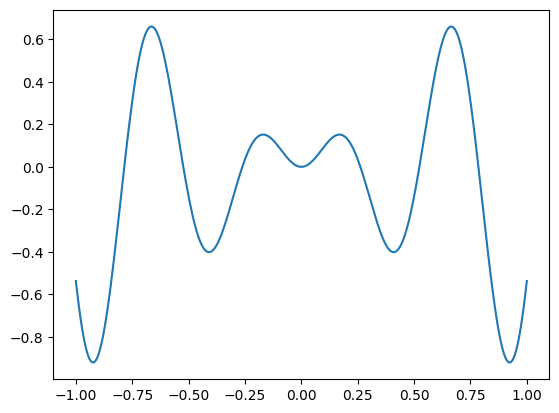

In [3]:
plt.plot(x, y);

## Create an interpolant

You can create an interpolant using the [interpolate](../api/interpolation/interpolate.rst) function by specifying:

- The function to interpolate
- The number of dimensions
- The degree of the polynomial interpolant

In [4]:
fx_interp = mp.interpolate(fx, spatial_dimension=1, poly_degree=4)

The interpolant can be evaluated on the test points:

In [5]:
y_interp = fx_interp(x)

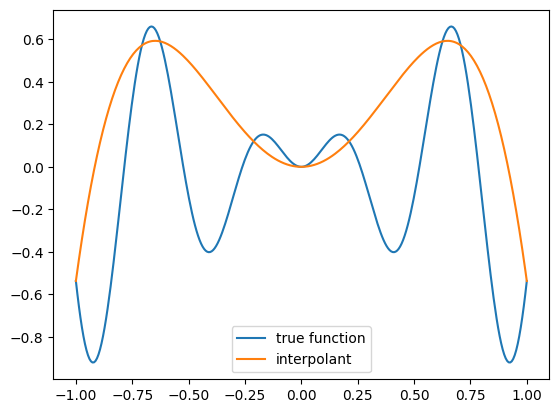

In [6]:
plt.plot(x, y, label="true function");
plt.plot(x, y_interp, label="interpolant");
plt.legend();

That shows that degree 4 polynomial is not accurate enough to approximate the true function.

The infinity norm provides a measure of the greatest error of the interpolant over the whole domain.
The norm is defined as:

$$
||f(x) - \hat{f}(x)||_\infty = \sup_{-1\leq x \leq 1} |f(x) - \hat{f}(x)|
$$

The infinity norm of the degree 4 polynomial is:

In [7]:
np.max(np.abs(y - y_interp))

0.9734664973643402

hardly a numerical convergence.

## Interpolants of increasing degrees

Let's create interpolant of increasing degrees and evaluate them on the test function:

In [8]:
degrees = [4, 8, 16, 32, 64]
y_interp = np.empty((x.size, len(degrees)))
for i,p in enumerate(degrees):
    fx_interp = mp.interpolate(fx, spatial_dimension=1, poly_degree=p)
    y_interp[:,i] = fx_interp(x)

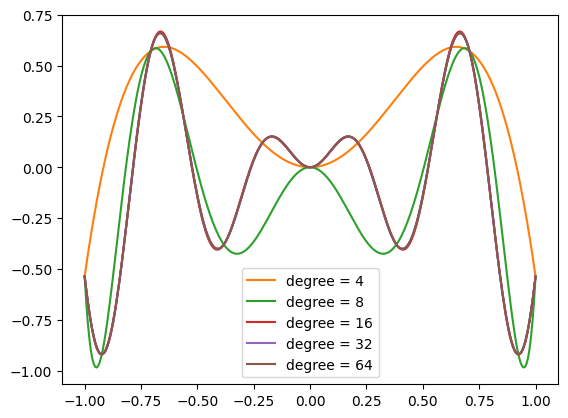

In [9]:
plt.plot(x, y);
for i,p in enumerate(degrees):
    plt.plot(x, y_interp[:,i], label="degree = {}".format(p));
plt.legend();

The numerical convergence is shown below:

In [10]:
errors = np.max(np.abs(y[:,np.newaxis] - y_interp),axis=0)

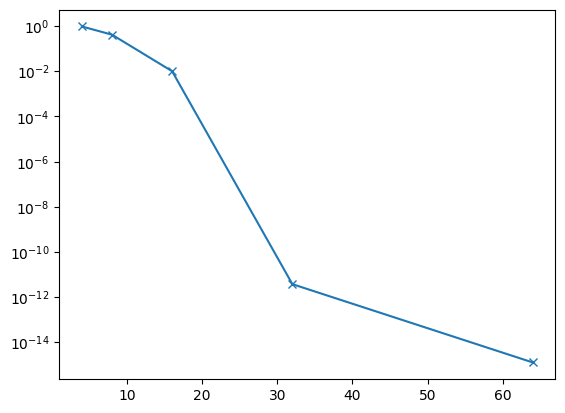

In [11]:
plt.plot(degrees,errors,'-x');
plt.yscale("log");

The absolute error of the degree 64 polynomials in the domain is shown below:

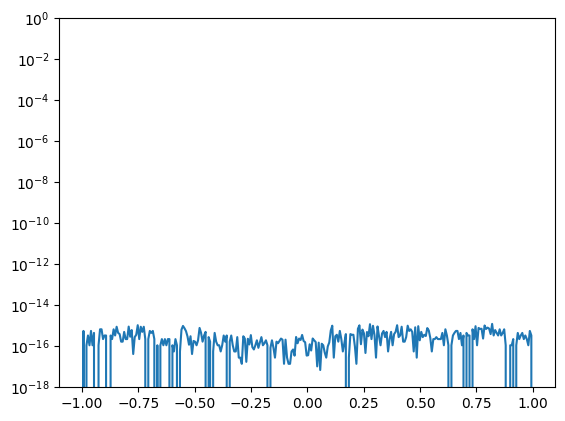

In [12]:
plt.plot(x, np.abs(y - y_interp[:,-1]));
plt.ylim(1e-18,1);
plt.yscale("log");

The seemingly random behavior of the (very small) absolute error indicates that machine precision has been reached. Compare it with the absolute error of degree 4 polynomials:

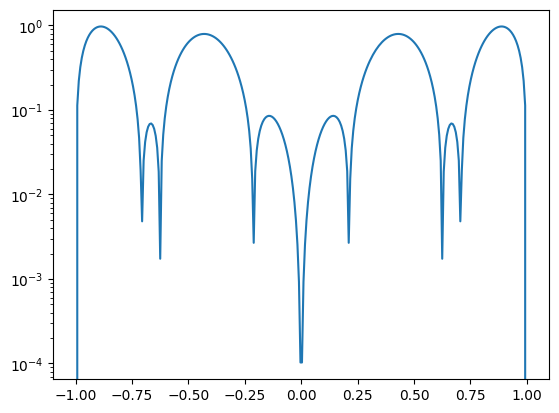

In [13]:
plt.plot(x, np.abs(y - y_interp[:,0]));
plt.yscale("log");